# **🌸 Tutoriel Complet : Utiliser Florence-2 pour analyser des images avec de l'IA**

## **✅ Objectif du tutoriel**

Tu vas apprendre à utiliser **Florence-2**, un modèle développé par Microsoft, capable de :

* détecter des objets sur une image (comme une voiture, un panneau, etc.),
* générer des descriptions d’objets ou de régions spécifiques dans l’image,
* comprendre des phrases pour identifier ce qu’elles désignent dans une image.


## **🧰 Prérequis**

Ce tutoriel fonctionne **dans Google Colab**, une plateforme gratuite de Google pour exécuter du code Python dans le cloud. Tu as juste besoin d’un compte Google.

## **Étape 1 :** Préparer l’environnement

> Cette étape permet d’installer les outils nécessaires à Florence-2.

Dans une cellule de Google Colab, copie et colle ce bloc :

In [1]:
!pip install timm flash_attn einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 59.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.1 MB/s eta 0:00:00
  Created wheel for flash_attn: filename=flash_attn-2.7.4.post1-cp311-cp311-linux_x

Ces bibliothèques sont des morceaux de code utiles à Florence-2 pour bien fonctionner.

## **Étape 2 :** Récupérer le code du projet Florence-2

In [2]:
%%bash
git clone https://github.com/AssemblyAI-Community/florence-2
mv florence-2/** .
rm -rf ./florence-2/

Cloning into 'florence-2'...


💡 Ici, on **télécharge le code officiel de Florence-2** depuis GitHub, un site où les projets open source sont partagés. Ensuite, on déplace tout dans notre dossier de travail.

## **Étape 3** : Importer les modules nécessaires

In [3]:
import copy

from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests

import utils  # C’est un fichier fourni par Florence-2

%matplotlib inline

Ce code importe tous les outils pour traiter les images et manipuler Florence-2.

## **Étape 4** : Charger le modèle Florence-2

In [4]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval().cuda()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


pytorch_model.bin:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

💡 Ici, on **télécharge le cerveau de Florence-2** et on l’envoie sur la carte graphique si possible (`.cuda()`).

## **Étape 5** : Initialiser Florence-2

In [5]:
utils.set_model_info(model, processor)

On donne les infos du modèle à Florence-2 pour qu’elle puisse fonctionner correctement avec ses propres fonctions.


## **Étape 6** : Charger une image

Tu dois fournir une image. Télécharge une image nommée `car.png` dans ton espace de travail (à gauche dans Colab → "Files").

Puis lance ce code :

In [8]:
path = "./car.png"
image = Image.open(path)
image_rgb = image.convert("RGB")  # format adapté au modèle

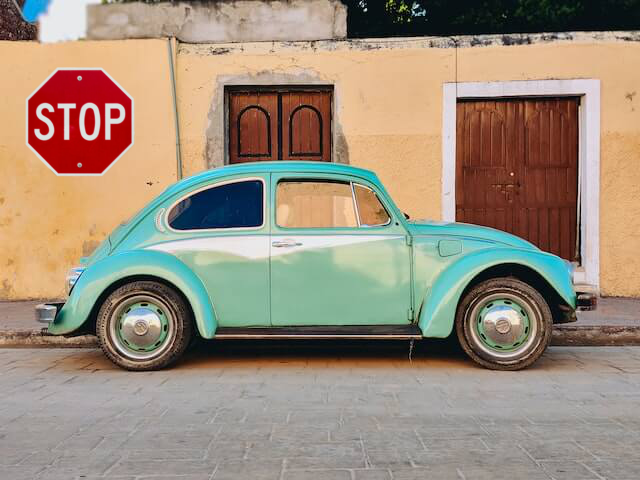

In [9]:
image

## **🧠 Partie 1 :** Détection d’objets (object detection)

On va maintenant détecter les objets visibles dans l’image.

<REGION_PROPOSAL> ---> {'bboxes': [[33.599998474121094, 160.55999755859375, 596.7999877929688, 371.7599792480469], [25.279998779296875, 67.43999481201172, 134.0800018310547, 175.9199981689453], [450.8800048828125, 276.7200012207031, 553.2799682617188, 370.79998779296875], [95.04000091552734, 280.55999755859375, 198.0800018310547, 371.2799987792969], [66.23999786376953, 266.6399841308594, 86.72000122070312, 295.91998291015625], [271.67999267578125, 241.67999267578125, 302.3999938964844, 246.95999145507812], [408.0, 308.3999938964844, 413.7599792480469, 320.8800048828125]], 'labels': ['', '', '', '', '', '', '']}


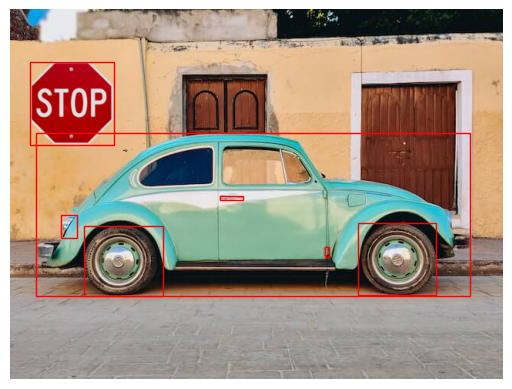

<OD> ---> {'bboxes': [[34.23999786376953, 160.55999755859375, 596.7999877929688, 371.7599792480469], [25.279998779296875, 67.43999481201172, 134.0800018310547, 175.9199981689453]], 'labels': ['car', 'stop sign']}


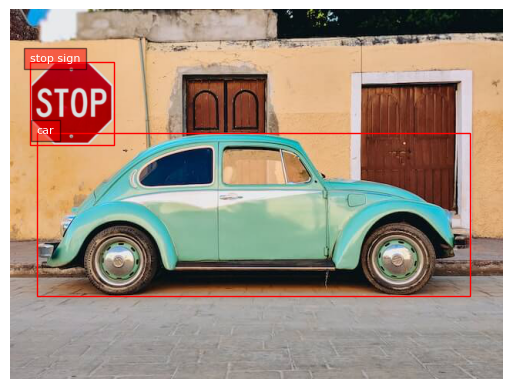

<DENSE_REGION_CAPTION> ---> {'bboxes': [[33.599998474121094, 160.0800018310547, 596.7999877929688, 371.7599792480469], [25.279998779296875, 67.43999481201172, 134.0800018310547, 175.9199981689453]], 'labels': ['turquoise Volkswagen Beetle', 'stop sign']}


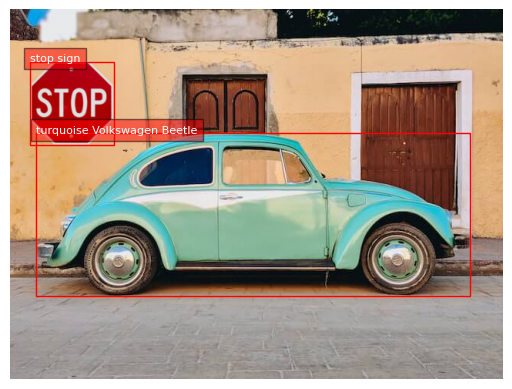

In [10]:
tasks = [
    utils.TaskType.REGION_PROPOSAL,        # Propositions de zones d’intérêt
    utils.TaskType.OBJECT_DETECTION,       # Détection d'objets avec noms
    utils.TaskType.DENSE_REGION_CAPTION,   # Description des régions
]

for task in tasks:
    results = utils.run_example(task, image_rgb)
    print(task.value,"--->", results[task])
    utils.plot_bbox(results[task], image)

## **🎯 Partie 2 :** Travailler avec des régions précises

### ➤ Exemple : Segmenter une zone (dessiner une forme autour)

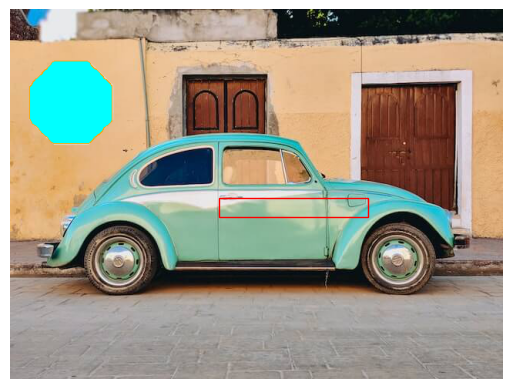

In [11]:
top_left = [422.0, 508.20001220703125]
bottom_right = [725.2000122070312, 559.7200317382812]
text_input = utils.convert_relative_to_loc(top_left + bottom_right)
results = utils.run_example(utils.TaskType.REG_TO_SEG, image_rgb, text_input=text_input)

bbox_coords = utils.convert_relative_to_bbox(top_left + bottom_right, image)
box = {'bboxes': [bbox_coords], 'labels': ['']}

image_copy = copy.deepcopy(image)
image_copy = utils.draw_polygons(image_copy, results[utils.TaskType.REG_TO_SEG], fill_mask=True)
utils.plot_bbox(box, image_copy)

## **🧾 Partie 3** : Décrire une région

Tu peux demander à Florence-2 de **donner une catégorie** (ex : voiture) ou une **description plus détaillée** (ex : une voiture verte stationnée).

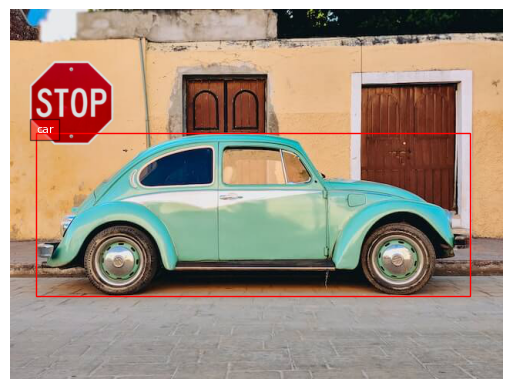

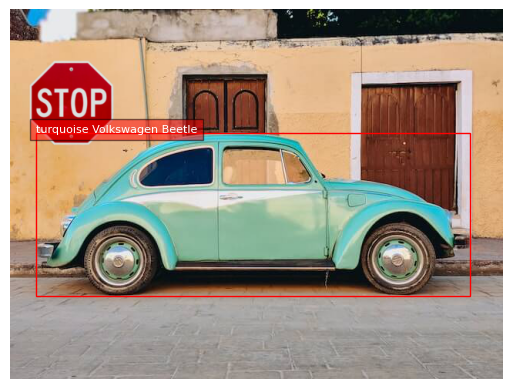

In [12]:
top_left = [52, 332]
bottom_right = [932, 774]
text_input = utils.convert_relative_to_loc(top_left + bottom_right)
bbox = utils.convert_relative_to_bbox(top_left + bottom_right, image)

for task_prompt in [utils.TaskType.REGION_TO_CATEGORY, utils.TaskType.REGION_TO_DESCRIPTION]:
    results = utils.run_example(task_prompt, image_rgb, text_input=text_input)
    text_result = results[task_prompt].strip().split('<')[0]

    box = {'bboxes': [bbox], 'labels': [text_result]}
    utils.plot_bbox(box, image)

## **💬 Partie 4** : Ajouter une phrase en entrée

### ➤ Exemple : Trouver une zone à partir d’une phrase

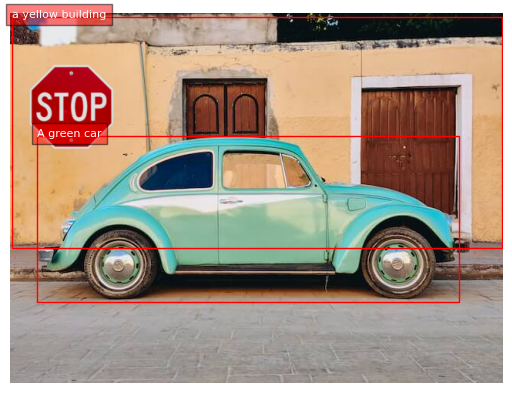

In [13]:
task_prompt = utils.TaskType.PHRASE_GROUNDING
results = utils.run_example(task_prompt, image_rgb, text_input="A green car parked in front of a yellow building.")
utils.plot_bbox(results[task_prompt], image)

## **🔎 Partie 5** : Détection de vocabulaire (inverse de la description)

Tu donnes un mot (ex : "stop") et Florence-2 trouve **où cela se trouve dans l’image**.

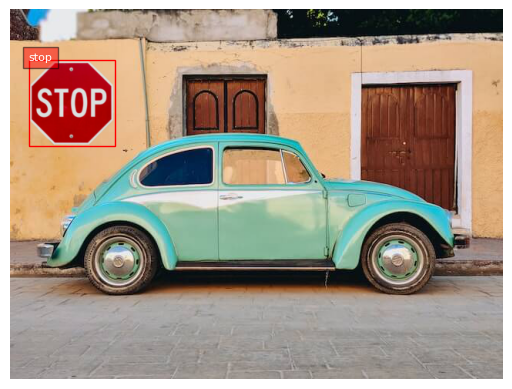

In [14]:
task_prompt = utils.TaskType.OPEN_VOCAB_DETECTION
results = utils.run_example(task_prompt, image_rgb, text_input="stop")
bbox_results = utils.convert_to_od_format(results[task_prompt])
utils.plot_bbox(bbox_results, image)

## **🖍️ Partie 6** : Segmentation par vocabulaire

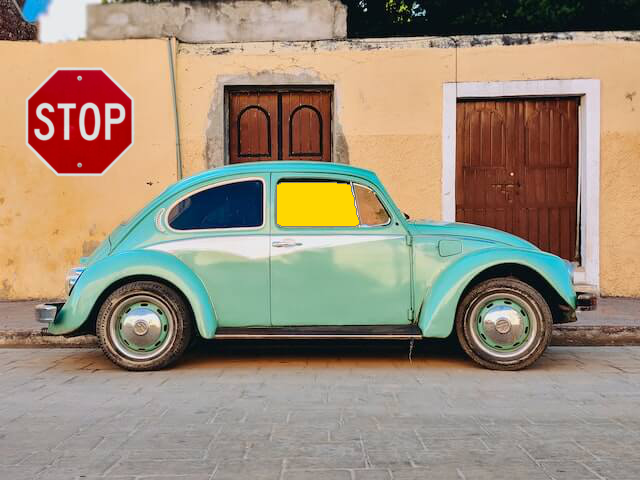

In [15]:
task_prompt = utils.TaskType.RES
results = utils.run_example(task_prompt, image_rgb, text_input="persons")
image_copy = copy.deepcopy(image)
utils.draw_polygons(image_copy, results[task_prompt], fill_mask=True)

## **🚀 Partie 7** : Enchaîner plusieurs tâches (cascade)

Florence-2 peut :

1. **Générer une description entière de l’image**
2. **Identifier chaque mot avec une zone**
3. **Segmenter les zones détectées**

Légende générée : A green car parked in front of a yellow building with a stop sign.


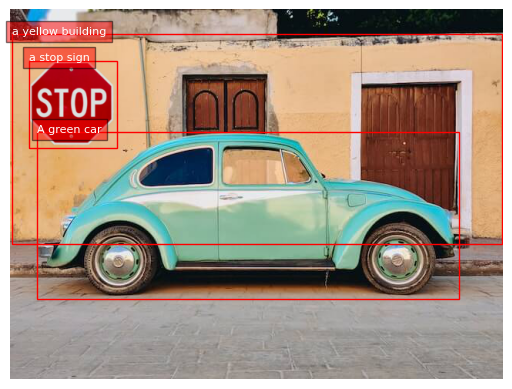

In [16]:
# Étape 1 : Générer une légende
caption_task = utils.TaskType.CAPTION
caption = utils.run_example(caption_task, image_rgb)
print("Légende générée :", caption[caption_task])

# Étape 2 : Trouver les zones correspondant à la légende
phrase_task = utils.TaskType.PHRASE_GROUNDING
results = utils.run_example(phrase_task, image_rgb, text_input=caption[caption_task])
utils.plot_bbox(results[phrase_task], image)

# Étape 3 : Segmenter chaque zone détectée
polygons = []
for box in results[phrase_task.value]['bboxes']:
    rel_box = utils.convert_bbox_to_relative(box, image)
    text_input = utils.convert_relative_to_loc(rel_box)
    run_results = utils.run_example(utils.TaskType.REG_TO_SEG, image_rgb, text_input=text_input)
    polygons += run_results[utils.TaskType.REG_TO_SEG]['polygons']



## **📌 Conclusion**

Avec ce tutoriel :

* Tu as appris à **installer et utiliser Florence-2**,
* Tu as exploré ses fonctions de **détection d’objets**, **description de régions**, **segmentation**, et plus encore,
* Tu as compris **comment chaîner les tâches intelligemment**.